In [62]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from keras.layers import LSTM, Dense, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from os.path import exists
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random

In [63]:
# df_failures = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_failures.csv")
                          
# df_machines = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_machines.csv")
                          
# df_telemetry = pd.read_csv("https://raw.githubusercontent.com/ashishpatel26/Predictive_Maintenance_using_Machine-Learning_Microsoft_Casestudy/master/data/PdM_telemetry.csv")

# df_failures.to_csv('equipment_failures.csv')
# df_machines.to_csv('equipment_machines.csv')
# df_telemetry.to_csv('equipment_telemetry.csv')                

In [64]:
df_failure = pd.read_csv('equipment_failures.csv')
df_machines = pd.read_csv('equipment_machines.csv')
df_telemetry = pd.read_csv('equipment_telemetry.csv')


In [65]:
df = pd.merge(df_failures, df_machines, on = "machineID")
df = pd.merge(df, df_telemetry, on = "machineID")
#df = df.sort_values(by = "datetime_x")
df

,datetime_x,machineID,failure,Unnamed: 0_x,model,age,Unnamed: 0_y,datetime_y,volt,rotate,pressure,vibration
0,2015-01-05 06:00:00,1,comp4,0,model3,18,0,2015-01-01 06:00:00,176.217853,418.504078,113.077935,45.087686
1,2015-01-05 06:00:00,1,comp4,0,model3,18,1,2015-01-01 07:00:00,162.879223,402.747490,95.460525,43.413973
2,2015-01-05 06:00:00,1,comp4,0,model3,18,2,2015-01-01 08:00:00,170.989902,527.349825,75.237905,34.178847
3,2015-01-05 06:00:00,1,comp4,0,model3,18,3,2015-01-01 09:00:00,162.462833,346.149335,109.248561,41.122144
4,2015-01-05 06:00:00,1,comp4,0,model3,18,4,2015-01-01 10:00:00,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...,...,...,...,...,...,...
6667116,2015-12-09 06:00:00,100,comp2,99,model4,5,876095,2016-01-01 02:00:00,179.438162,395.222827,102.290715,50.771941
6667117,2015-12-09 06:00:00,100,comp2,99,model4,5,876096,2016-01-01 03:00:00,189.617555,446.207972,98.180607,35.123072
6667118,2015-12-09 06:00:00,100,comp2,99,model4,5,876097,2016-01-01 04:00:00,192.483414,447.816524,94.132837,48.314561
6667119,2015-12-09 06:00:00,100,comp2,99,model4,5,876098,2016-01-01 05:00:00,165.475310,413.771670,104.081073,44.835259


In [66]:
print(df.columns)

print(df.head())
print(df.info())

print(results.shape)


Index(['datetime_x', 'machineID', 'failure', 'Unnamed: 0_x', 'model', 'age',
       'Unnamed: 0_y', 'datetime_y', 'volt', 'rotate', 'pressure',
       'vibration'],
      dtype='object')
            datetime_x  machineID failure  Unnamed: 0_x   model  age  \
0  2015-01-05 06:00:00          1   comp4             0  model3   18   
1  2015-01-05 06:00:00          1   comp4             0  model3   18   
2  2015-01-05 06:00:00          1   comp4             0  model3   18   
3  2015-01-05 06:00:00          1   comp4             0  model3   18   
4  2015-01-05 06:00:00          1   comp4             0  model3   18   

   Unnamed: 0_y           datetime_y        volt      rotate    pressure  \
0             0  2015-01-01 06:00:00  176.217853  418.504078  113.077935   
1             1  2015-01-01 07:00:00  162.879223  402.747490   95.460525   
2             2  2015-01-01 08:00:00  170.989902  527.349825   75.237905   
3             3  2015-01-01 09:00:00  162.462833  346.149335  109.248561   


 Discover what the data looks like for the first 100 transactions


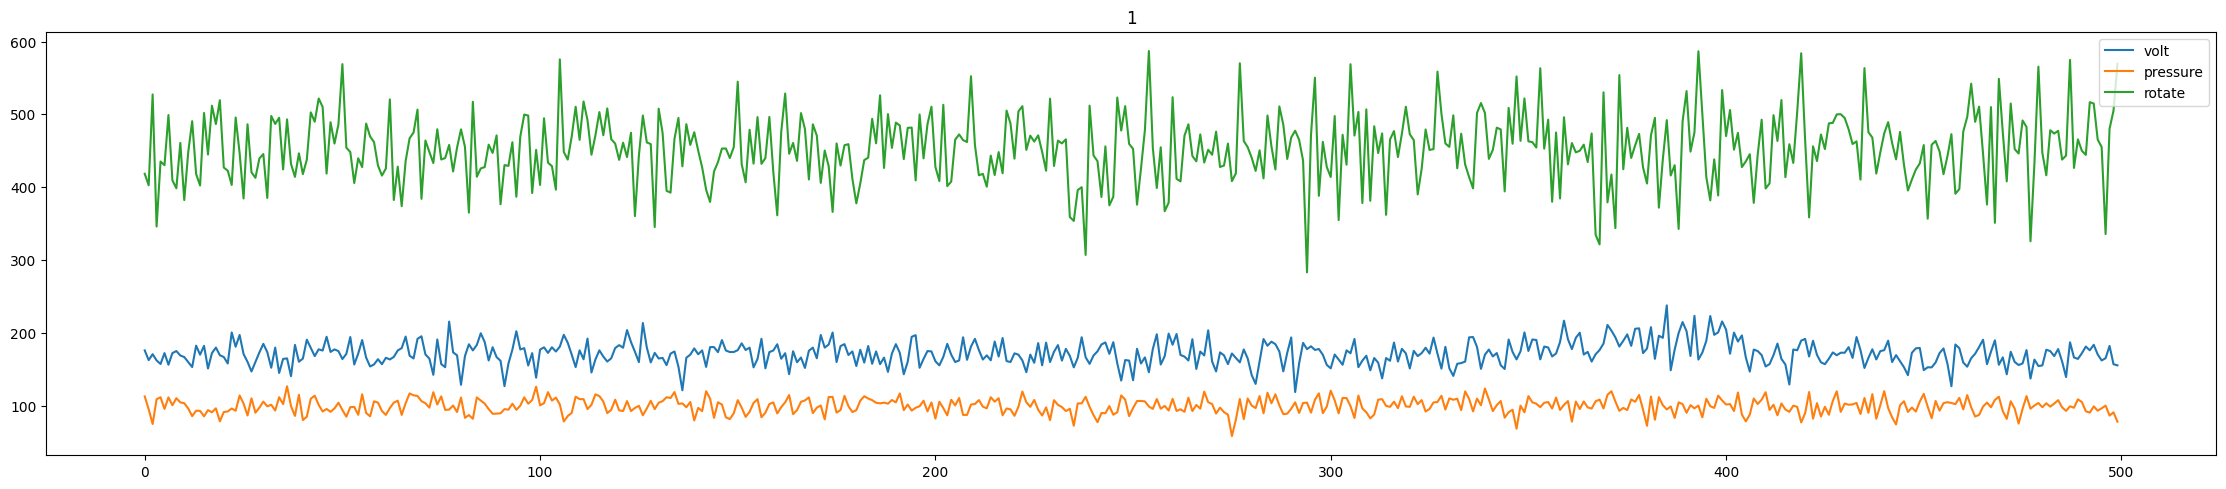

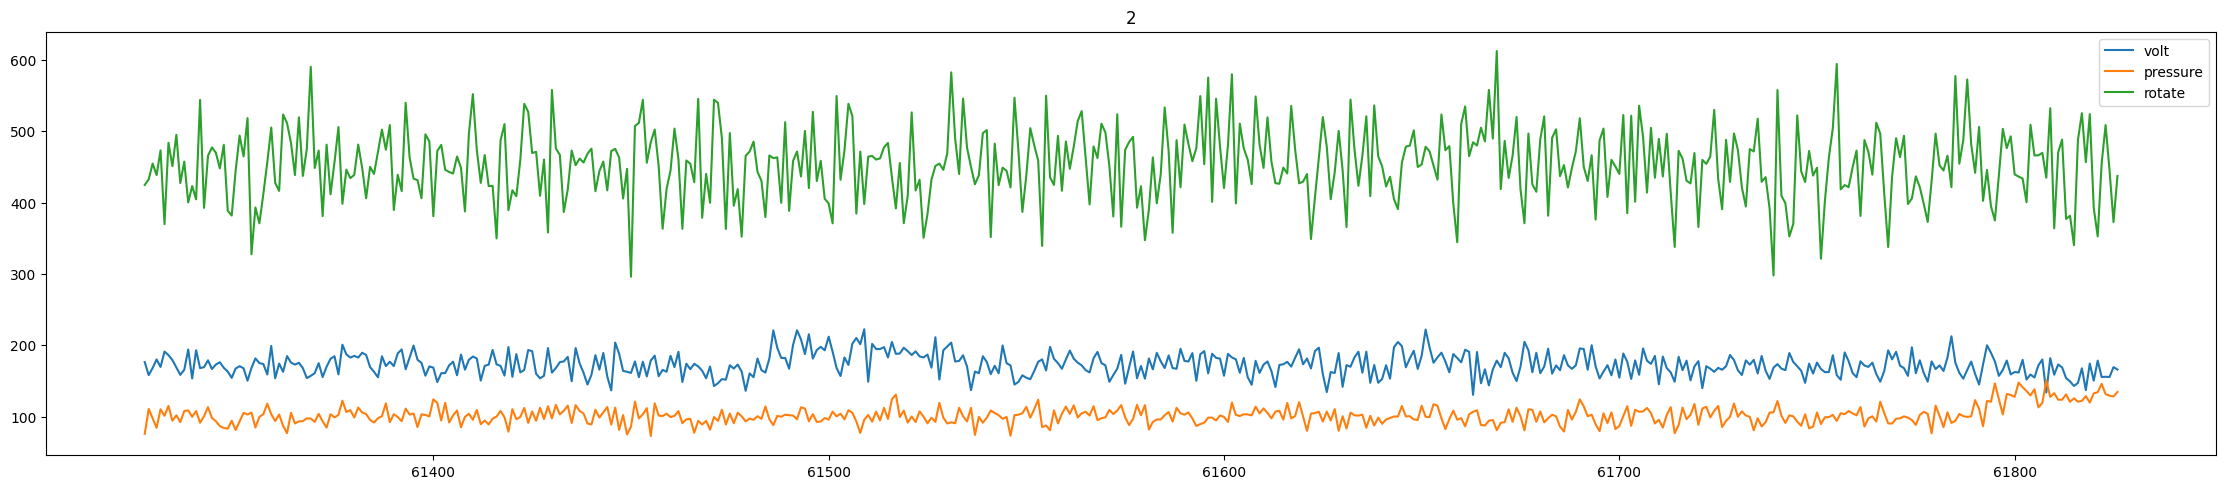

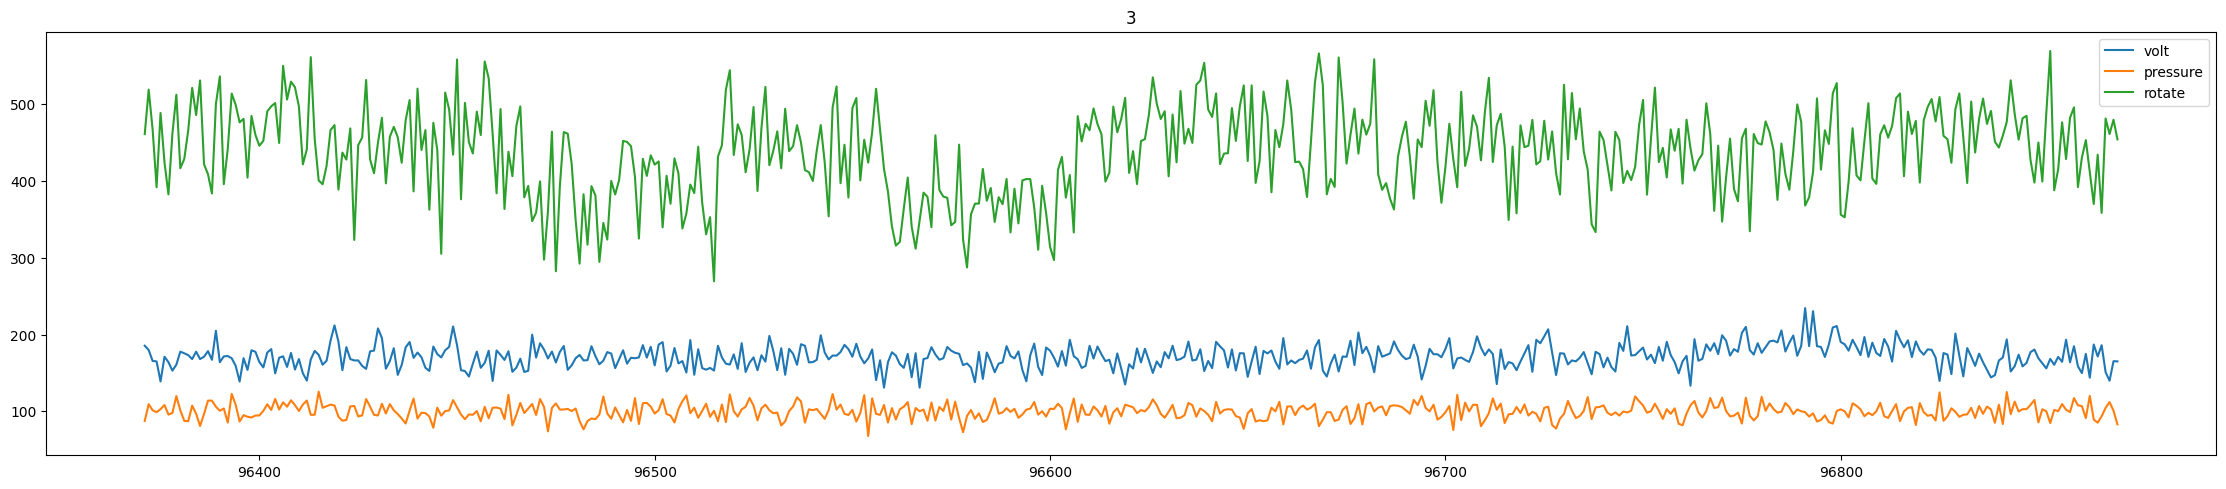

In [67]:
print(" Discover what the data looks like for the first 100 transactions")
machineIDs = []
grouped = df.groupby('machineID')
for machineID in grouped:
    machineIDs.append(machineID[0])
    
#print (machineIDs)

plt.rcParams["figure.figsize"] = (28,5.5)
for machineID in machineIDs[0:3]:
    #print (machineID)
    filter = df['machineID'] == machineID
    results = df[filter][:500]
    #print (len(results))
    #print (results['datetime_x'])
    x = range(0,len(results)-1,1)
    plt.plot(results['volt'], label = 'volt')
    plt.plot(results['pressure'], label = 'pressure')
    plt.plot(results['rotate'], label = 'rotate')
    #twin_ax = plt.twinx()
    #twin_ax.plot(results['age'], label = 'age')
    plt.title(machineID)
    plt.legend()
    plt.show()

In [79]:
print("Drop non-contributing features and dummy the multi-class output")

# Drop unnecessary columns safely
columns_to_drop = ["Unnamed: 0_x", "Unnamed: 0_y", "datetime_x", "datetime_y", "age"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

# Rename 'failure' column to 'label' if it exists
if "failure" in df.columns:
    df.rename(columns={"failure": "label"}, inplace=True)

failure_types = set(df['label'])
    
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['model'] = encoder.fit_transform(df['model'])

X_columns = [x for x in df.columns if x != 'label']

X = df[X_columns]
y = df['label']

y = pd.get_dummies(y).astype(int)

print(y)
print(df.columns)
print(df.head(1))


Drop non-contributing features and dummy the multi-class output
         0  1  2  3
0        0  0  0  1
1        0  0  0  1
2        0  0  0  1
3        0  0  0  1
4        0  0  0  1
...     .. .. .. ..
6667116  0  1  0  0
6667117  0  1  0  0
6667118  0  1  0  0
6667119  0  1  0  0
6667120  0  1  0  0

[6667121 rows x 4 columns]
Index(['machineID', 'label', 'model', 'volt', 'rotate', 'pressure',
       'vibration'],
      dtype='object')
   machineID  label  model        volt      rotate    pressure  vibration
0          1      3      2  176.217853  418.504078  113.077935  45.087686


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
    
print(X_train.columns)
print("rows", X_train.shape[0], "colums",X_train.shape[1])
print((X_train.shape[0], X_train.shape[1],1))


Index(['machineID', 'model', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')
rows 4466971 colums 6
(4466971, 6, 1)


In [84]:


print("building the LSTM model")

look_back =1;
model = Sequential();
features = len(X_columns)
model.add(LSTM(units = 550, activation ='tanh', return_sequences=True, input_shape=(look_back, features),dtype = "float32"))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation ='tanh', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(len(y_train.columns), activation= 'softmax'))
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

building the LSTM model


In [85]:
print("X train shape", X_train.shape)

print("y train shape", y_train.shape)

X train shape (4466971, 6)
y train shape (4466971, 4)


Train the model
0 1000


saved weights


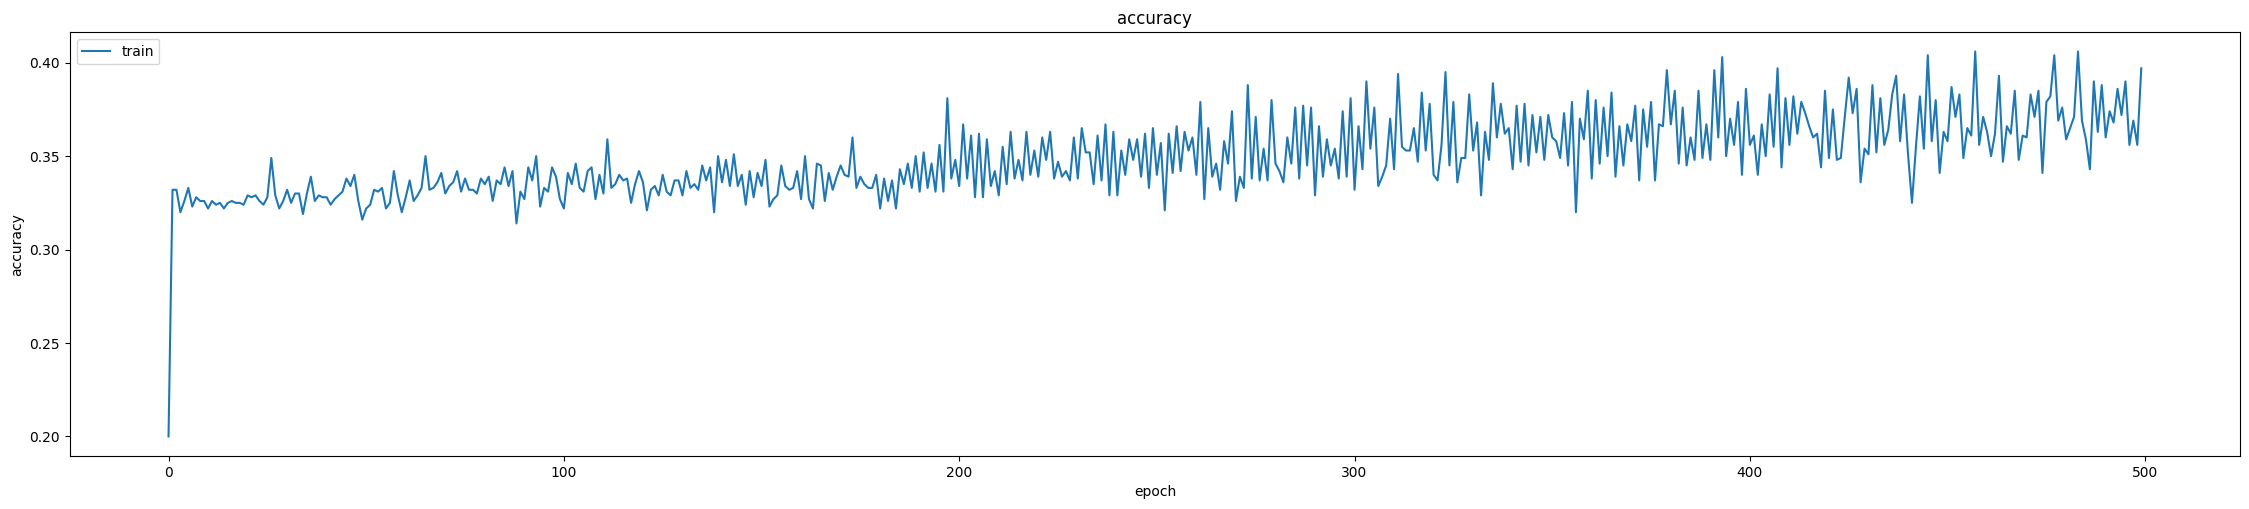

loaded weights
1000 2000
saved weights


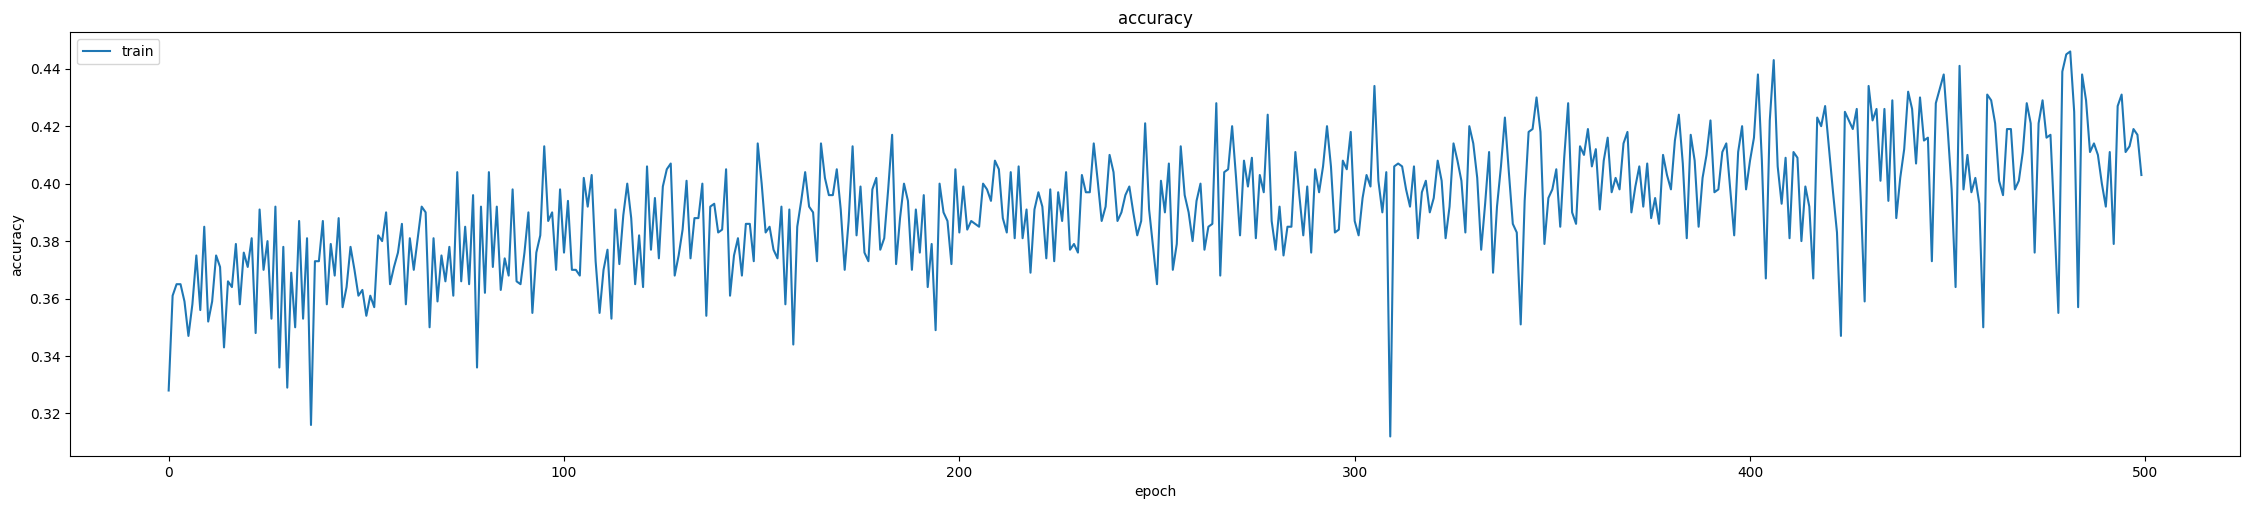

loaded weights
2000 3000
saved weights


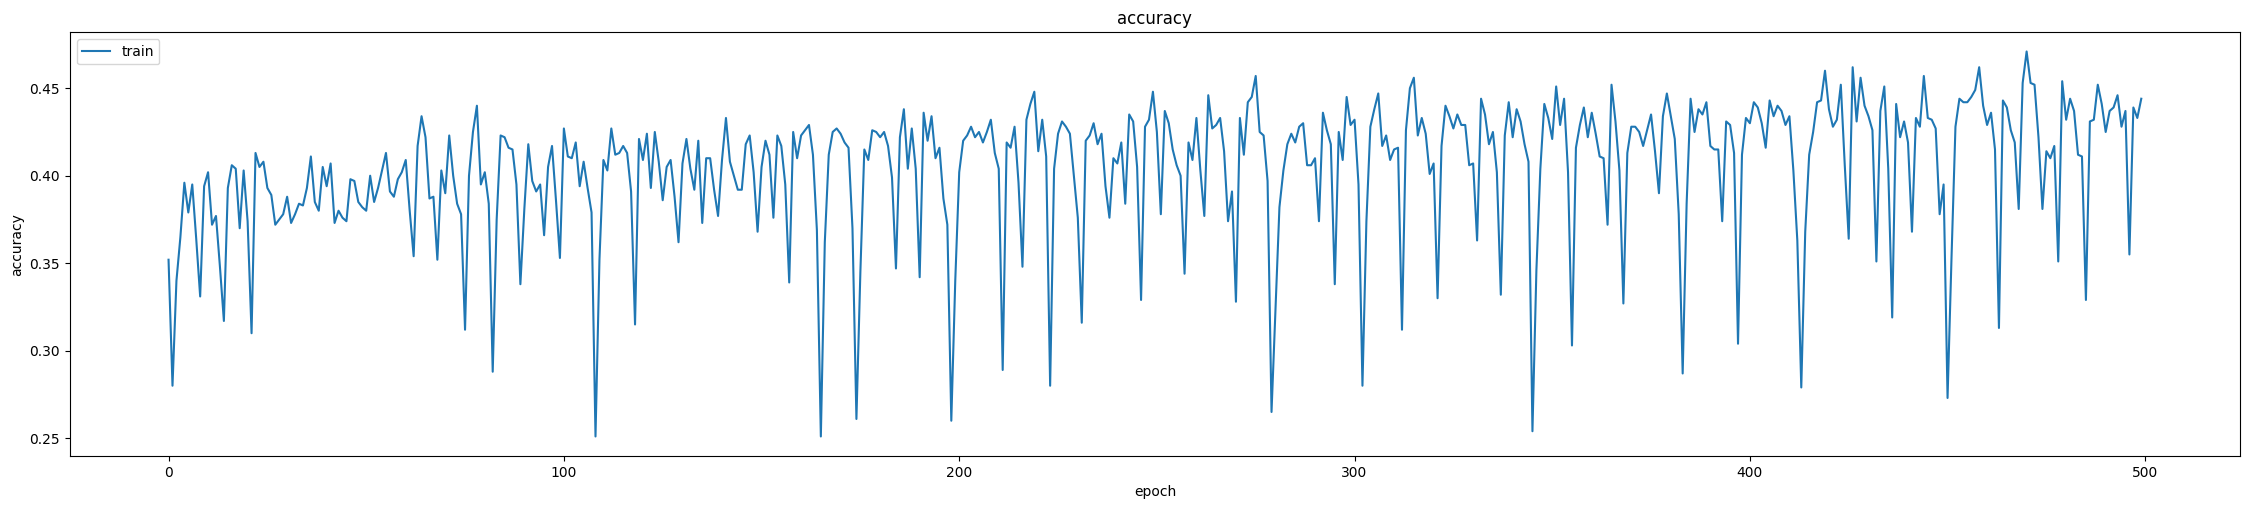

loaded weights
3000 4000
saved weights


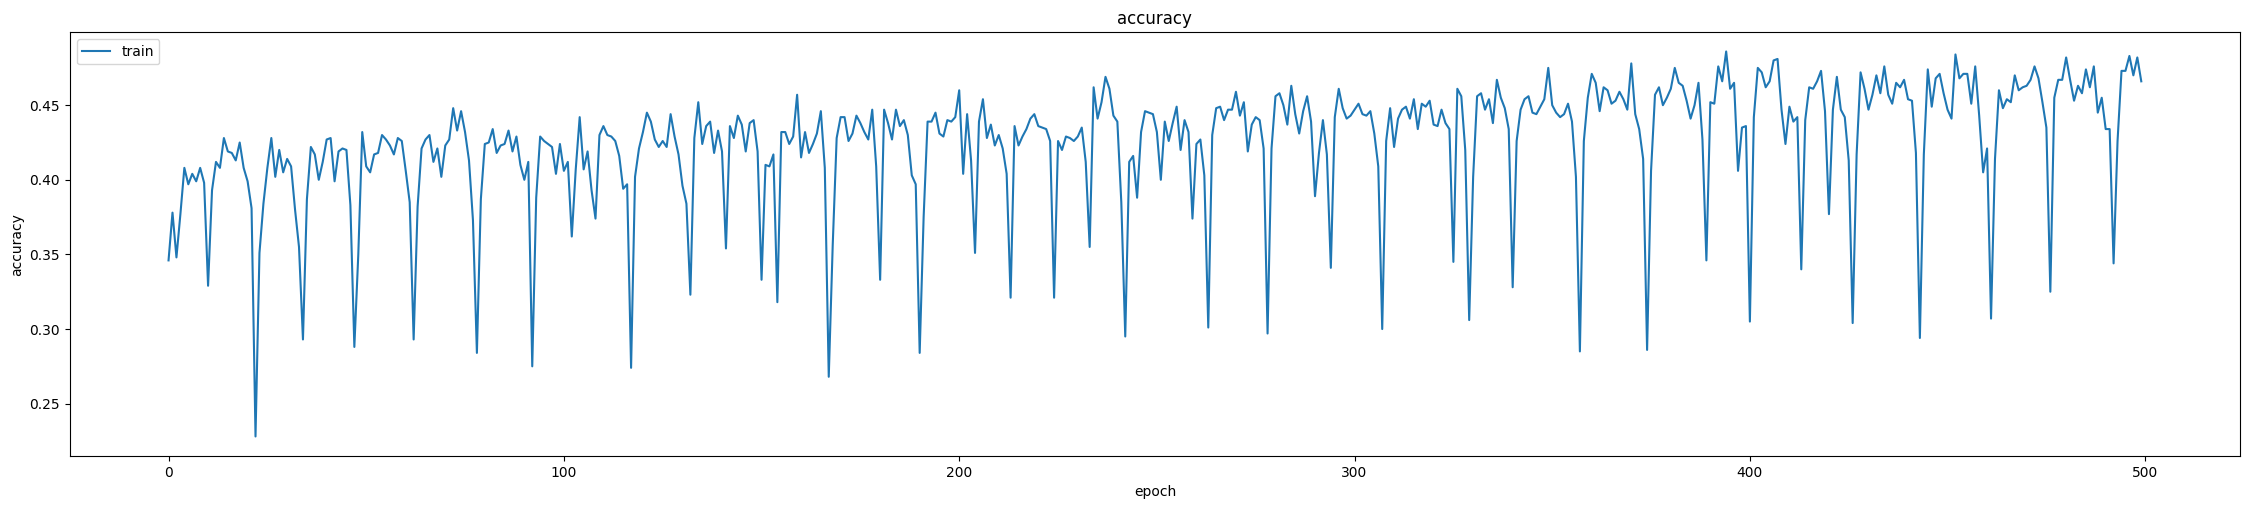

loaded weights
4000 5000
saved weights


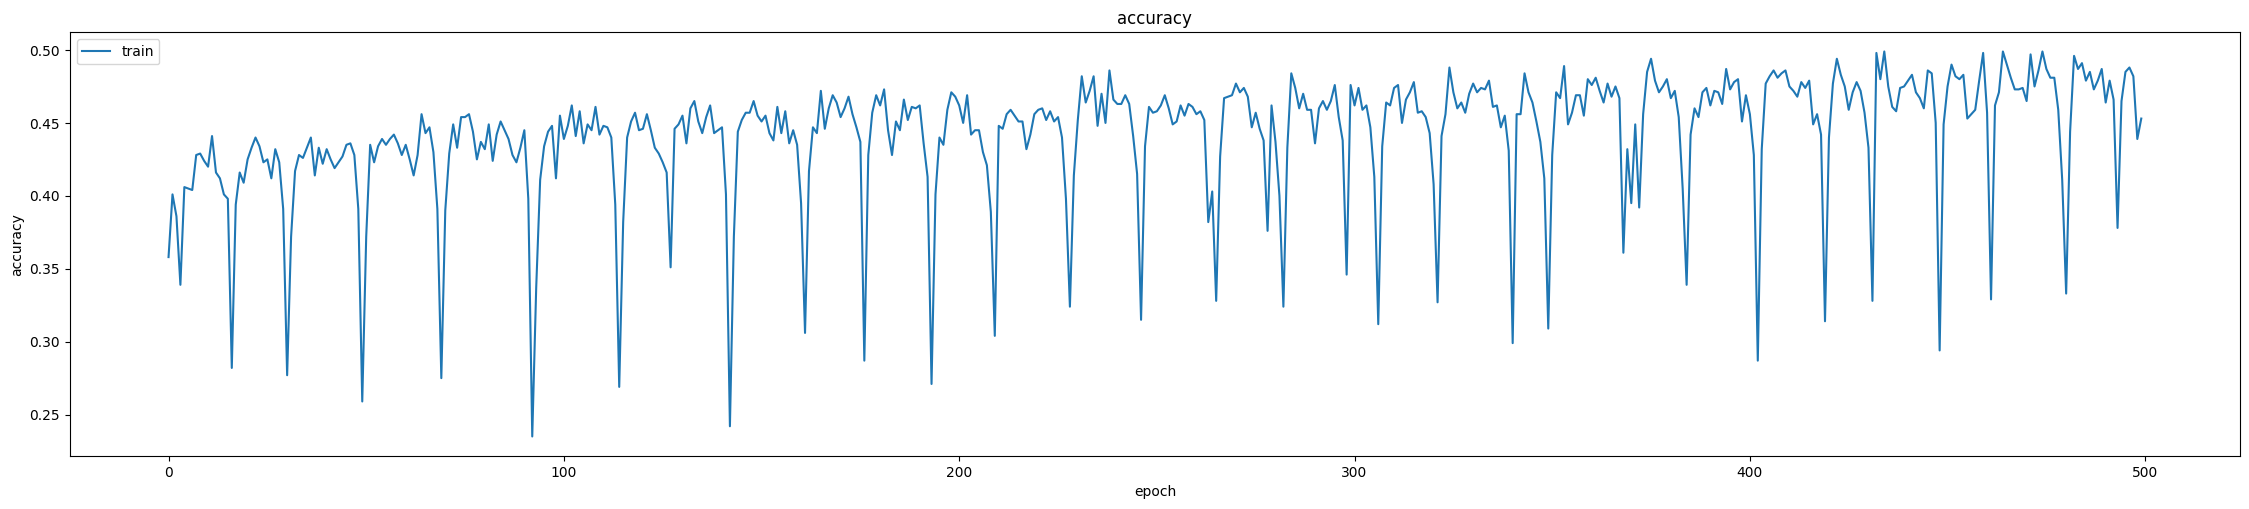

loaded weights
5000 6000
saved weights


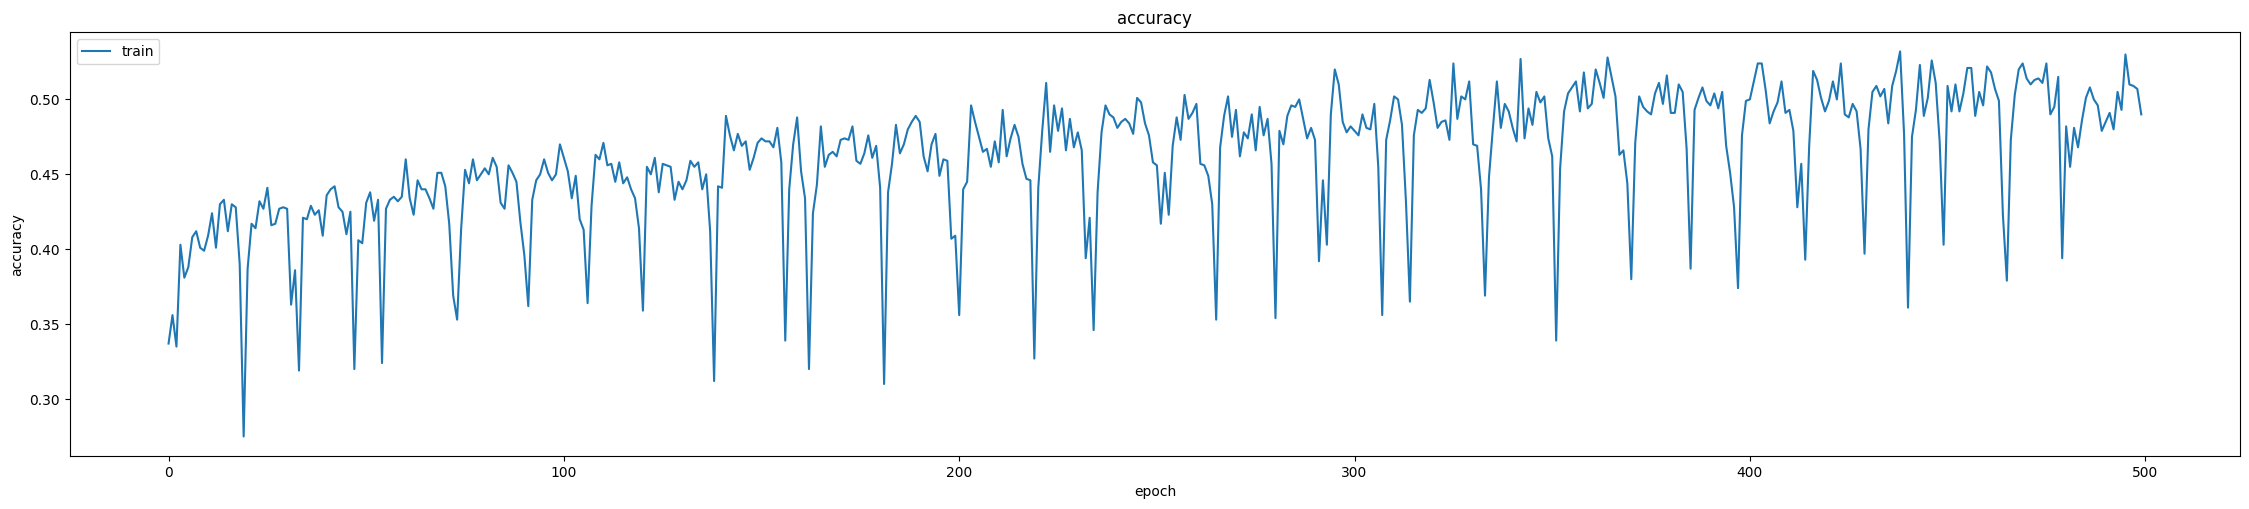

loaded weights
6000 7000


KeyboardInterrupt: 

In [86]:
def plotHistory(history):
    plt.plot(history.history['accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

print("Train the model")
length = len(X_train)
path_to_file ="C:\\Users\\Paras Sharma\\lstm_equipment_model.h5"
batch_size = 1000
start_pos = 0
look_back = 1

for index in range(start_pos, length, batch_size):
    if index > 0:
        file_exists = exists(path_to_file)
        if file_exists:
            model.load_weights(path_to_file)
            print("loaded weights")
        print(index - batch_size, index)
        X = np.asarray(X_train[index - batch_size:index]).astype(np.float32)
        X = np.resize(X, (X.shape[0], look_back, X.shape[1]))
        y = np.asarray(y_train[index - batch_size:index]).astype(np.float32)
        history = model.fit(X, y, batch_size=len(X), epochs=500, verbose=0)
        model.save_weights(path_to_file)  # can give whole path to save model
        print("saved weights")
        plotHistory(history)
